In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

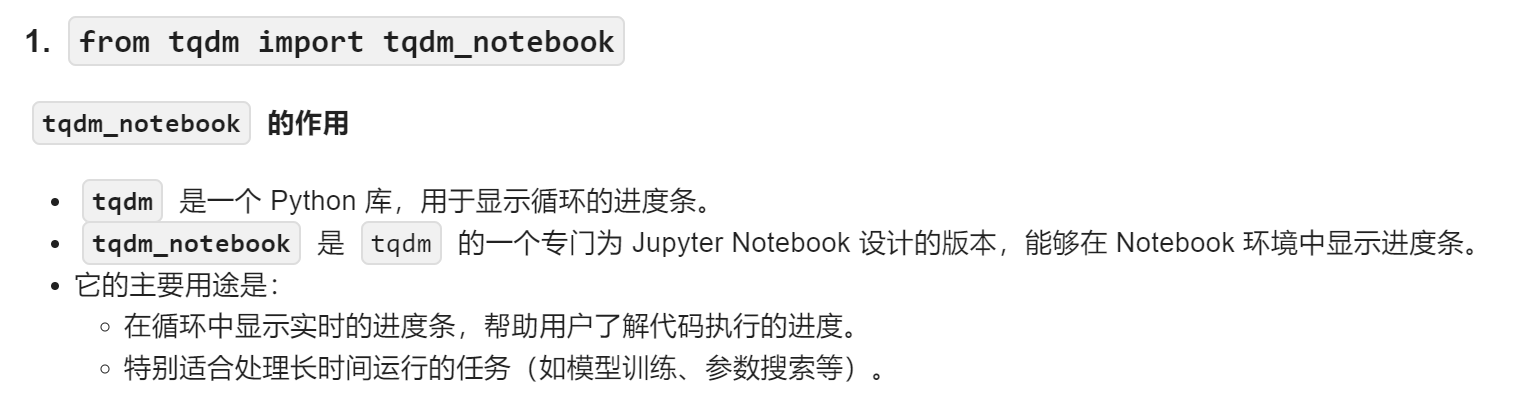
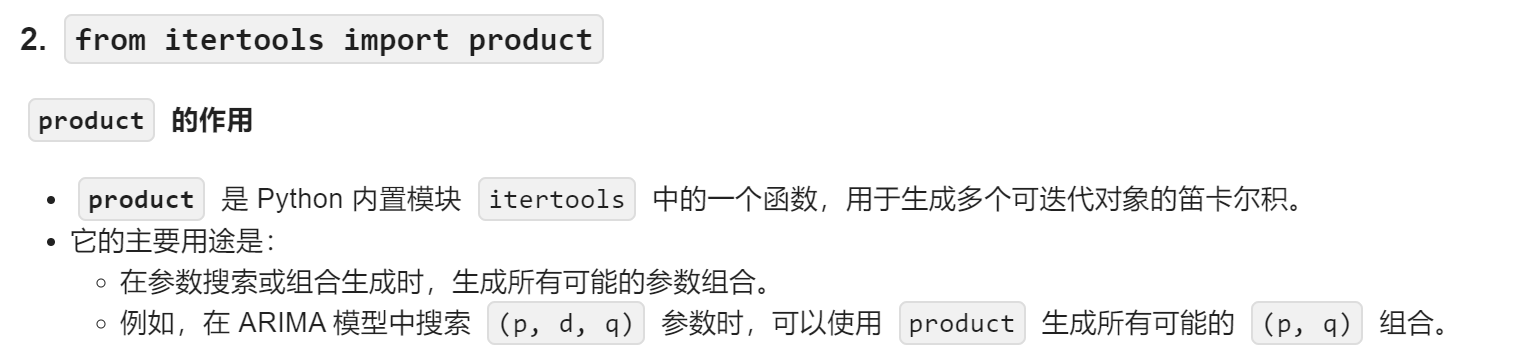

In [2]:
df = pd.read_csv('C:/Users/jay/TimeSeriesForecastingInPython-master/data/air-passengers.csv')

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


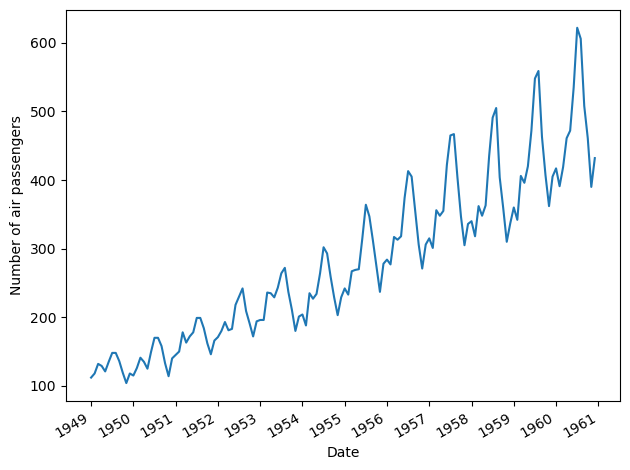

In [5]:
fig, ax = plt.subplots()
ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

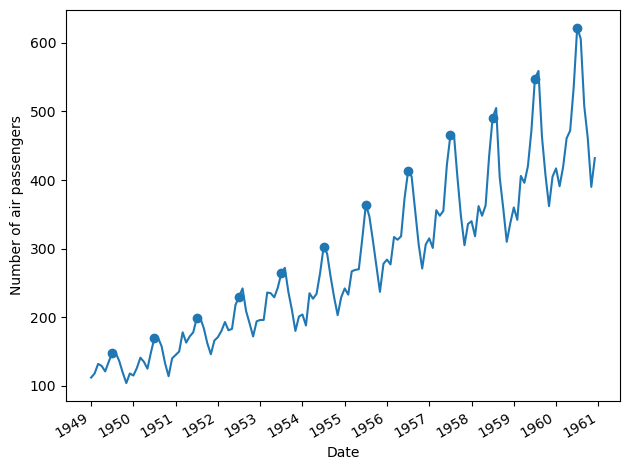

In [6]:
fig, ax = plt.subplots()
ax.plot(df['Month'], df['Passengers'], markevery=np.arange(6, 145, 12),
        marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

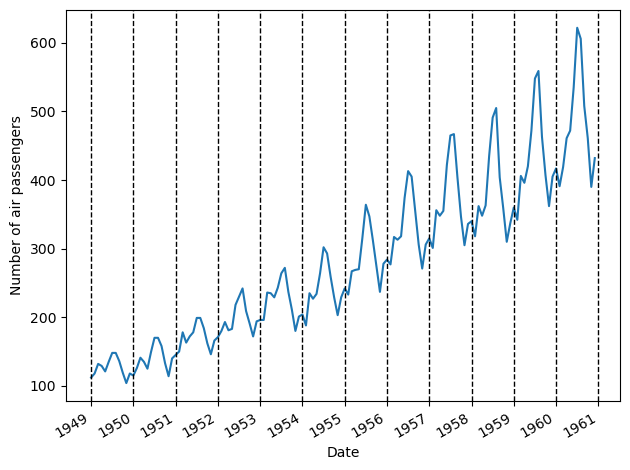

In [7]:
fig, ax = plt.subplots()
ax.plot(df['Month'], df['Passengers'])
for i in np.arange(0, 145, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

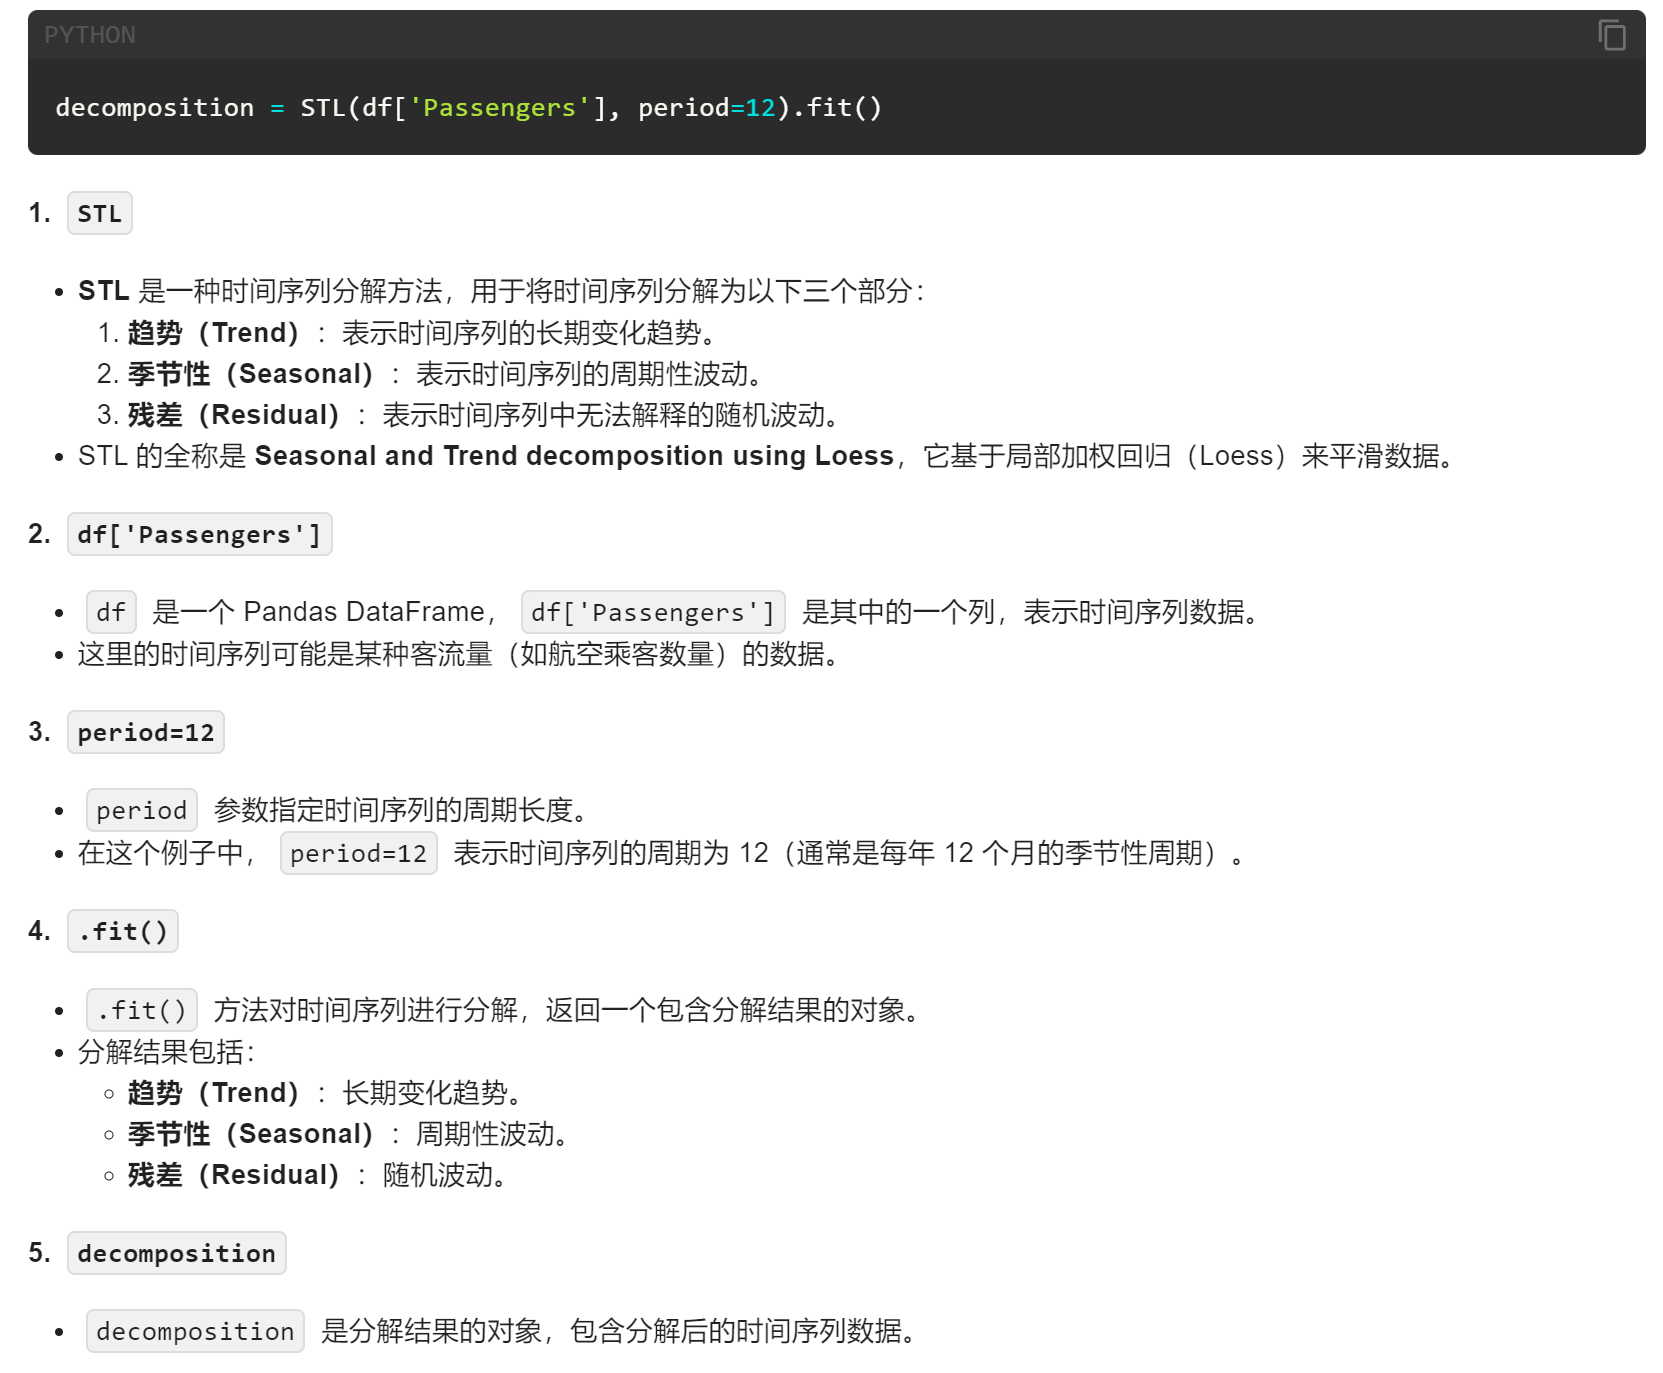

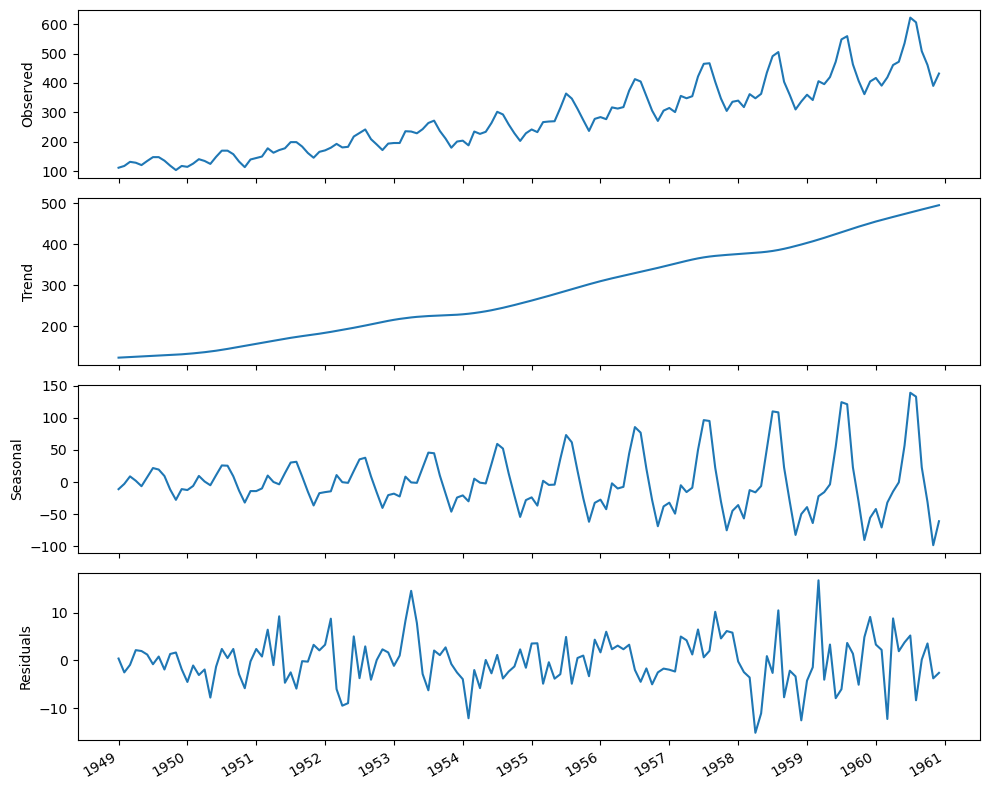

In [8]:
decomposition = STL(df['Passengers'], period=12).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,
                                         figsize=(10,8))
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
plt.xticks(np.arange(0,145,12), np.arange(1949,1962,1))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

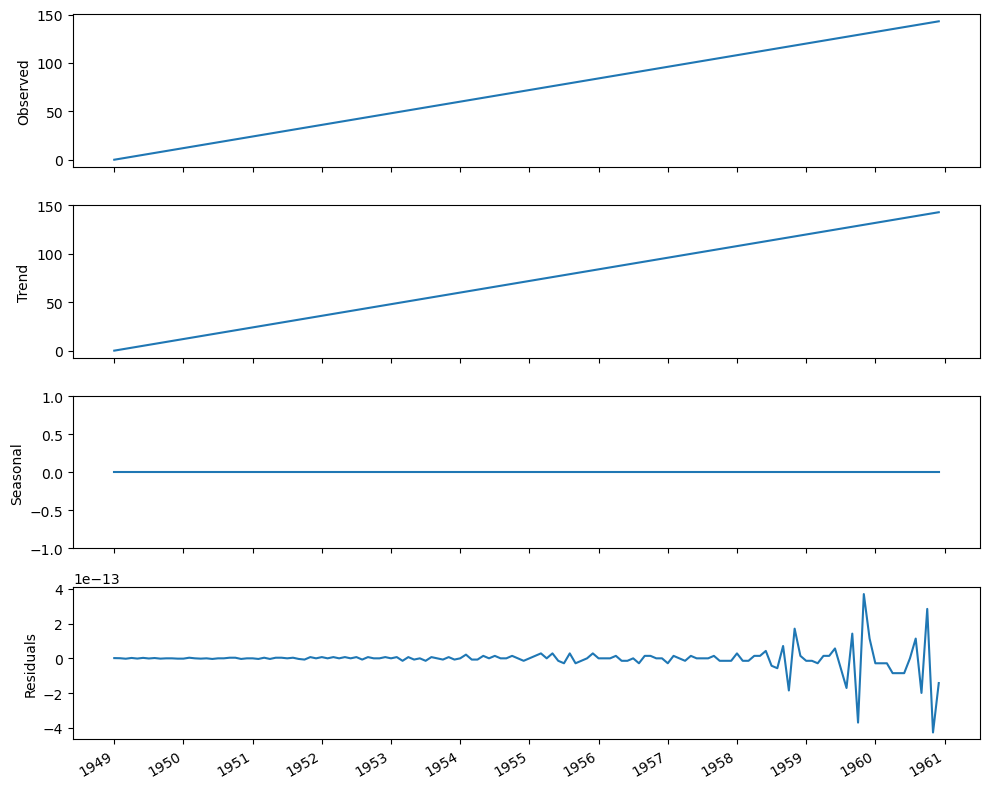

In [9]:
linear_ts = np.arange(0, 144, 1)
decomposition = STL(linear_ts, period=12).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [10]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [11]:
ad_fuller_result = adfuller(df['Passengers'])

In [12]:
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


In [13]:
df_diff = np.diff(df['Passengers'], n=1)
ad_fuller_result = adfuller(df_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.8292668241699994
p-value: 0.0542132902838255


In [14]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)
ad_fuller_result = adfuller(df_diff_seasonal_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -17.62486236018866
p-value: 3.823046855895306e-30


In [15]:
df_diff2 = np.diff(df_diff, n=1)
ad_fuller_result = adfuller(df_diff2)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -16.384231542468505
p-value: 2.7328918500142407e-29


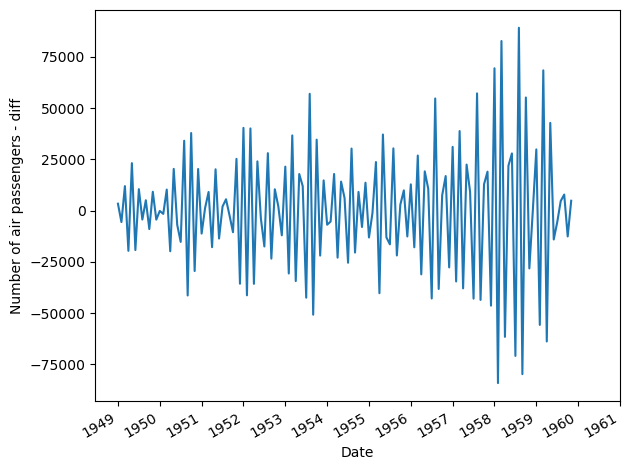

In [16]:
fig, ax = plt.subplots()
ax.plot(df['Month'][13:], df_diff_seasonal_diff)
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers - diff')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [17]:
df_diff

array([   6,   14,   -3,   -8,   14,   13,    0,  -12,  -17,  -15,   14,
         -3,   11,   15,   -6,  -10,   24,   21,    0,  -12,  -25,  -19,
         26,    5,    5,   28,  -15,    9,    6,   21,    0,  -15,  -22,
        -16,   20,    5,    9,   13,  -12,    2,   35,   12,   12,  -33,
        -18,  -19,   22,    2,    0,   40,   -1,   -6,   14,   21,    8,
        -35,  -26,  -31,   21,    3,  -16,   47,   -8,    7,   30,   38,
         -9,  -34,  -30,  -26,   26,   13,   -9,   34,    2,    1,   45,
         49,  -17,  -35,  -38,  -37,   41,    6,   -7,   40,   -4,    5,
         56,   39,   -8,  -50,  -49,  -35,   35,    9,  -14,   55,   -8,
          7,   67,   43,    2,  -63,  -57,  -42,   31,    4,  -22,   44,
        -14,   15,   72,   56,   14, -101,  -45,  -49,   27,   23,  -18,
         64,  -10,   24,   52,   76,   11,  -96,  -56,  -45,   43,   12,
        -26,   28,   42,   11,   63,   87,  -16,  -98,  -47,  -71,   42],
      dtype=int64)

In [18]:
df_diff2

array([   8,  -17,   -5,   22,   -1,  -13,  -12,   -5,    2,   29,  -17,
         14,    4,  -21,   -4,   34,   -3,  -21,  -12,  -13,    6,   45,
        -21,    0,   23,  -43,   24,   -3,   15,  -21,  -15,   -7,    6,
         36,  -15,    4,    4,  -25,   14,   33,  -23,    0,  -45,   15,
         -1,   41,  -20,   -2,   40,  -41,   -5,   20,    7,  -13,  -43,
          9,   -5,   52,  -18,  -19,   63,  -55,   15,   23,    8,  -47,
        -25,    4,    4,   52,  -13,  -22,   43,  -32,   -1,   44,    4,
        -66,  -18,   -3,    1,   78,  -35,  -13,   47,  -44,    9,   51,
        -17,  -47,  -42,    1,   14,   70,  -26,  -23,   69,  -63,   15,
         60,  -24,  -41,  -65,    6,   15,   73,  -27,  -26,   66,  -58,
         29,   57,  -16,  -42, -115,   56,   -4,   76,   -4,  -41,   82,
        -74,   34,   28,   24,  -65, -107,   40,   11,   88,  -31,  -38,
         54,   14,  -31,   52,   24, -103,  -82,   51,  -24,  113],
      dtype=int64)

In [19]:
df_diff_seasonal_diff

array([  3394,  -5567,  11963, -19595,  23168, -19218,  10474,  -4319,
         5067,  -8988,   9214,  -4380,   -147,  -1573,  10279, -19788,
        20372,  -6905, -15233,  34087, -41362,  37856, -29445,  20324,
       -11184,   1356,   9103, -17803,  20170, -13598,   2006,   5561,
        -2268, -10520,  25268, -35642,  40364, -41284,  40095, -35689,
        24045,  -3854, -17469,  28036, -23398,  10415,   2096, -12028,
        21468, -30641,  36690, -34347,  17858,  11967, -42442,  56979,
       -50734,  34624, -21908,  14757,  -6861,  -5303,  17883, -22915,
        14160,   6145, -25396,  30283, -20434,   9134,  -7972,  13627,
       -13069,  -1164,  23706, -40251,  37128, -13019, -16430,  30376,
       -21846,   2961,   9884, -12586,  12822, -17861,  26889, -31067,
        19162,  10660, -42833,  54703, -38189,   7513,  16874, -27669,
        31112, -34532,  38823, -37893,  22466,   9221, -42899,  57189,
       -43530,  12859,  19012, -46321,  69435, -84087,  82727, -61535,
      

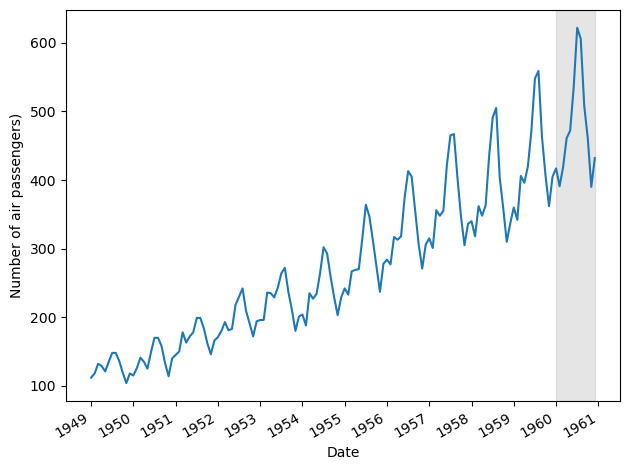

In [20]:
fig, ax = plt.subplots()
ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers)')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [21]:
def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int)\
->pd.DataFrame:
    results = []
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1]), 
                            simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [22]:
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int,
                    D: int, s:int) -> pd.DataFrame:
    results = []
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1]),
                            seasonal_order=(order[2], D, order[3], s),
                            simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df
                    

In [23]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))
train = df['Passengers'][:-12]

In [26]:
ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(11, 3, 0, 0)",1016.901650
1,"(11, 4, 0, 0)",1019.013328
2,"(11, 5, 0, 0)",1020.426922
3,"(12, 0, 0, 0)",1020.665142
4,"(11, 1, 0, 0)",1021.026814
...,...,...
164,"(5, 0, 0, 0)",1281.732157
165,"(3, 0, 0, 0)",1300.282335
166,"(2, 0, 0, 0)",1302.913196
167,"(1, 0, 0, 0)",1308.152194


In [27]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
train = df['Passengers'][:-12]
d = 1
D = 1
s = 12
SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(2, 1, 1, 2)",892.238604
1,"(2, 1, 2, 1)",893.830296
2,"(2, 1, 1, 3)",894.106723
3,"(1, 0, 1, 2)",894.285480
4,"(3, 2, 2, 3)",894.652737
...,...,...
251,"(0, 0, 2, 0)",906.940147
252,"(3, 2, 0, 3)",907.181875
253,"(0, 0, 3, 2)",907.421109
254,"(0, 0, 3, 0)",908.742583


In [28]:
ARIMA_model = SARIMAX(train, order=(11, 2, 3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:              SARIMAX(11, 2, 3)   Log Likelihood                -493.451
Date:                Tue, 06 May 2025   AIC                           1016.902
Time:                        15:33:53   BIC                           1059.915
Sample:                             0   HQIC                          1034.379
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8253      0.100     -8.254      0.000      -1.021      -0.629
ar.L2         -0.9622      0.049    -19.547      0.000      -1.059      -0.866
ar.L3         -0.8511      0.087     -9.743      0.0

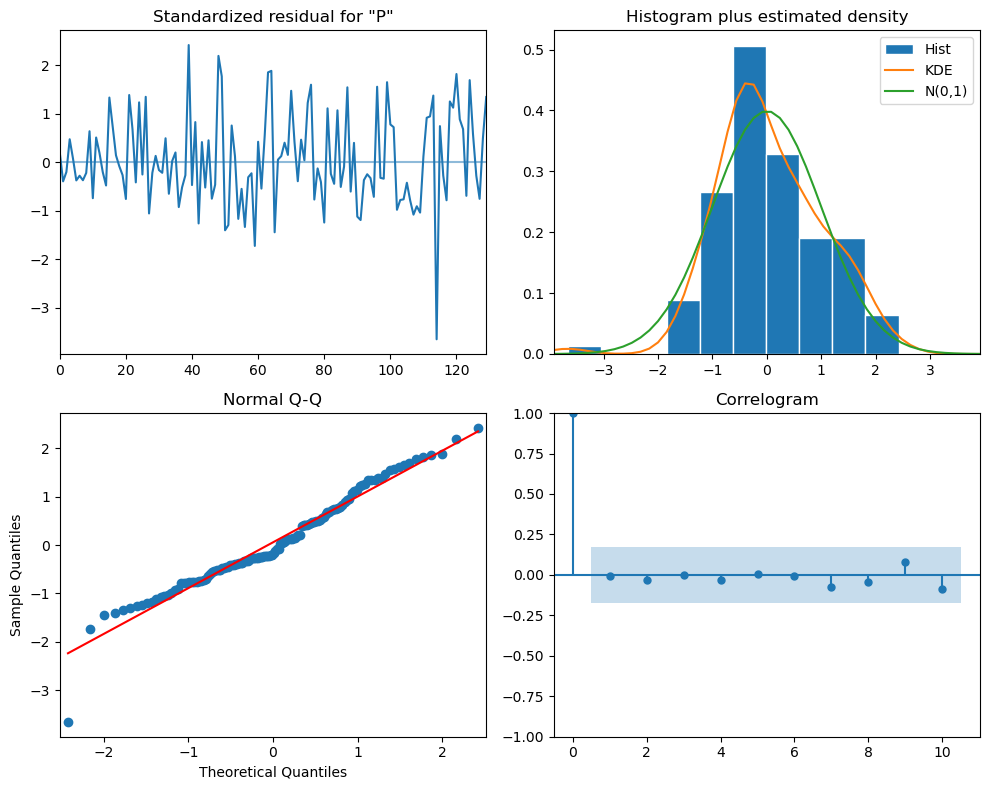

In [30]:
ARIMA_model_fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [31]:
residuals = ARIMA_model_fit.resid
results = acorr_ljungbox(residuals, lags=np.arange(1,11,1), return_df=True)
print(results['lb_pvalue'])

1     0.010380
2     0.035342
3     0.074012
4     0.100511
5     0.135622
6     0.189737
7     0.212143
8     0.277178
9     0.363668
10    0.310537
Name: lb_pvalue, dtype: float64


In [32]:
test = df.iloc[-12:]
test['naive_seasonal'] = df['Passengers'].iloc[120:132].values
test

,Month,Passengers,naive_seasonal
132,1960-01,417,360
133,1960-02,391,342
134,1960-03,419,406
135,1960-04,461,396
136,1960-05,472,420
137,1960-06,535,472
138,1960-07,622,548
139,1960-08,606,559
140,1960-09,508,463
141,1960-10,461,407


In [35]:
ARIMA_pred = ARIMA_model_fit.get_prediction(132, 143).predicted_mean

In [36]:
ARIMA_pred

132    422.287161
133    410.561410
134    461.687042
135    457.413741
136    481.491147
137    530.798102
138    605.990818
139    615.296753
140    525.521528
141    467.422054
142    425.112447
143    467.367784
Name: predicted_mean, dtype: float64

In [37]:
test['ARIMA_pred'] = ARIMA_pred
test

,Month,Passengers,naive_seasonal,ARIMA_pred
132,1960-01,417,360,422.287161
133,1960-02,391,342,410.561410
134,1960-03,419,406,461.687042
135,1960-04,461,396,457.413741
136,1960-05,472,420,481.491147
137,1960-06,535,472,530.798102
138,1960-07,622,548,605.990818
139,1960-08,606,559,615.296753
140,1960-09,508,463,525.521528
141,1960-10,461,407,467.422054


In [39]:
SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12),
                      simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)
print(SARIMA_model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                              Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -439.119
Date:                                 Tue, 06 May 2025   AIC                            892.239
Time:                                         15:57:56   BIC                            911.692
Sample:                                              0   HQIC                           900.138
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2666      0.085    -14.962      0.000      -1.433      -1

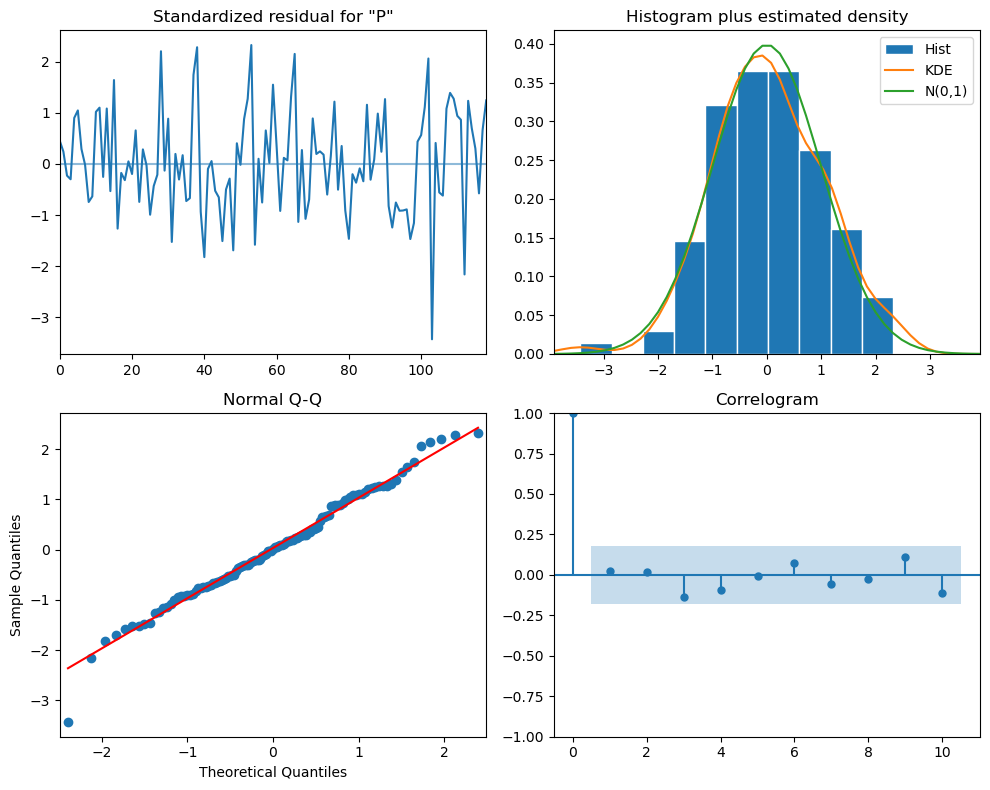

In [40]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8))
plt.tight_layout()
plt.show()

In [41]:
residuals = SARIMA_model_fit.resid
results = acorr_ljungbox(residuals, lags=np.arange(1,11,1), return_df=True)
print(results['lb_pvalue'])

1     0.944535
2     0.689058
3     0.796225
4     0.873899
5     0.920357
6     0.944263
7     0.940923
8     0.950845
9     0.973941
10    0.893320
Name: lb_pvalue, dtype: float64


In [42]:
SARIMA_pred = SARIMA_model_fit.get_prediction(132, 143).predicted_mean
test['SARIMA_pred'] = SARIMA_pred
test

,Month,Passengers,naive_seasonal,ARIMA_pred,SARIMA_pred
132,1960-01,417,360,422.287161,418.522526
133,1960-02,391,342,410.561410,399.583830
134,1960-03,419,406,461.687042,461.324541
135,1960-04,461,396,457.413741,451.457356
136,1960-05,472,420,481.491147,473.760357
137,1960-06,535,472,530.798102,538.796050
138,1960-07,622,548,605.990818,612.468800
139,1960-08,606,559,615.296753,624.640116
140,1960-09,508,463,525.521528,520.189669
141,1960-10,461,407,467.422054,462.866347


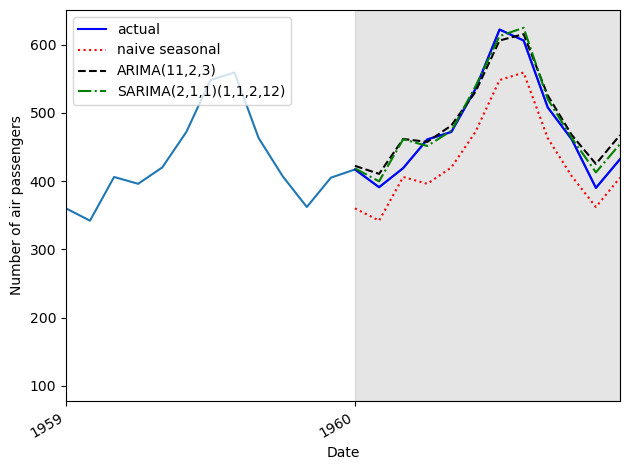

In [43]:
fig, ax = plt.subplots()
ax.plot(df['Month'], df['Passengers'])
ax.plot(test['Passengers'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(11,2,3)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(2,1,1)(1,1,2,12)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(0,145,12), np.arange(1949,1962,1))
ax.set_xlim(120, 143)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [44]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
mape_naive_seasonal = mape(test['Passengers'], test['naive_seasonal'])
mape_ARIMA = mape(test['Passengers'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Passengers'], test['SARIMA_pred'])
print(mape_naive_seasonal, mape_ARIMA, mape_SARIMA)

9.987532920823485 3.8477615090878965 2.8509362658631496


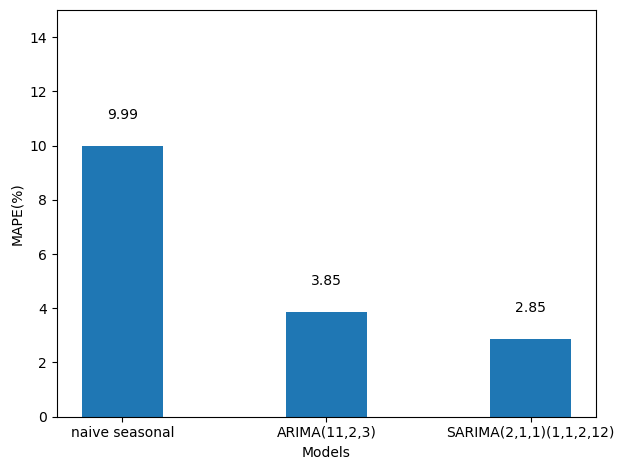

In [46]:
fig, ax = plt.subplots()
x = ['naive seasonal', 'ARIMA(11,2,3)', 'SARIMA(2,1,1)(1,1,2,12)']
y = [mape_naive_seasonal, mape_ARIMA, mape_SARIMA]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE(%)')
ax.set_ylim(0,15)
for index, value in enumerate(y):
    plt.text(x=index, y=value+1, s=str(round(value,2)), ha='center')
plt.tight_layout()
plt.show()